In [2]:
import os
import pandas as pd
import re

In [3]:
import generate_tasks as gt
import csv_helper as ch
import search_algorithm as alg

[0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8  ]


In [4]:
def count_schedulable(dataframe):
  is_schedulable = (dataframe["thm1"] == True) & (dataframe["thm2"] == True) & (dataframe["thm3"] == True)

  return len(dataframe[is_schedulable]) / len(dataframe) * 100

def count_eligible(dataframe):
  is_eligible = (dataframe["thm1"] == False) & (dataframe["thm2"] == True) & (dataframe["thm3"] == True)

  return len(dataframe[is_eligible]) / len(dataframe) * 100

def count_never_schedulable(dataframe):
  is_never_schedulable = (dataframe["thm2"] == False) | (dataframe["thm3"] == False)

  return len(dataframe[is_never_schedulable]) / len(dataframe) * 100

def count_tighten_no_effect(dataframe, result):
  is_tighten_fails = (dataframe[" results"] == "No more eligible candidates")
  is_eligible = (dataframe["thm1"] == False) & (dataframe["thm2"] == True) & (dataframe["thm3"] == True)

  return len(dataframe[is_tighten_fails]) / len(dataframe[is_eligible]) * 100

def count_tighten_success(dataframe, result):
  is_tighten_success = (dataframe[" results"] == "True")
  is_eligible = (dataframe["thm1"] == False) & (dataframe["thm2"] == True) & (dataframe["thm3"] == True)

  return len(dataframe[is_tighten_success]) / len(dataframe[is_eligible]) * 100

def count_all_schedulable_post_tighten(dataframe, result):
  is_schedulable_post_tighten = ((dataframe["thm1"] == True) & (dataframe["thm2"] == True) & (dataframe["thm3"] == True)) | (dataframe[" results"] == "True")

  return len(dataframe[is_schedulable_post_tighten]) / len(dataframe) * 100

def get_average_runtime(dataframe, time):
  is_eligible = (dataframe["thm1"] == False) & (dataframe["thm2"] == True) & (dataframe["thm3"] == True)
  return dataframe.loc[is_eligible, "process time"].mean()

In [5]:
def print_search_results(dataframe, algorithm_type):
  fff_perc = count_never_schedulable(dataframe)
  ftt_perc = count_eligible(dataframe)
  no_change_perc = count_tighten_no_effect(dataframe, algorithm_type + '_result')
  change_perc = count_tighten_success(dataframe, algorithm_type + '_result')
  ttt_perc = count_schedulable(dataframe)
  post_change_ttt_perc = count_all_schedulable_post_tighten(dataframe, algorithm_type + '_result')
  average_time = get_average_runtime(dataframe, algorithm_type + '_time')
  print("{:<50s}{:>10.2f}%".format("Increase in schedulability", ((post_change_ttt_perc - ttt_perc)/ttt_perc) * 100))


  print("{:<50s}{:>10.2f}%".format("Schedulable before tightening", ttt_perc))
  print("{:<50s}{:>10.2f}%".format("Unschedulable and ineligible for tightening", fff_perc))
  print("{:<50s}{:>10.2f}%".format("Eligible for tightening", ftt_perc))
  print("{:<50s}{:>10.2f}%".format("Unschedulable after tightening", no_change_perc))
  print("{:<50s}{:>10.2f}%".format("Schedulable after tightening", change_perc))
  print("{:<50s}{:>10.2f}%".format("Schedulable", post_change_ttt_perc))
  print("{:<50s}{:>10.2f}".format("Average runtime", average_time))

  return average_time, change_perc



In [8]:
SIM_DATABASE_FILEPATH = './db2_search/' 
SIM_DB = ch.get_csv_filepath(SIM_DATABASE_FILEPATH)
time, success_rate = [], []

for db in SIM_DB[:15]:
  utilization_tag = re.search(r"_([0-9]+)", db).group(1)
  print("--------------------{}----------------------".format(utilization_tag))
  dataframe = ch.read_csv_to_processed_dataframe(db)
  # print(dataframe.columns)
  dataframe["process time"] = dataframe["process time"].astype(float)
  is_eligible = (dataframe["thm1"] == False) & (dataframe["thm2"] == True) & (dataframe["thm3"] == True)
  t, sr = print_search_results(dataframe, "search")
  time.append(t/1000)
  success_rate.append(sr)
  if int(utilization_tag) == 650 or int(utilization_tag) == 300:
    print(utilization_tag, dataframe.loc[is_eligible, "num_tasks"].mean())
    print(utilization_tag, dataframe.loc[is_eligible, "t_max"].mean())


print(success_rate)
print(sum(success_rate)/len(success_rate))
print(sum(time)/len(time))




--------------------300----------------------
Increase in schedulability                              0.24%
Schedulable before tightening                          96.04%
Unschedulable and ineligible for tightening             1.75%
Eligible for tightening                                 2.21%
Unschedulable after tightening                         89.59%
Schedulable after tightening                           10.41%
Schedulable                                            96.27%
Average runtime                                      9265.76
300 6.144796380090498
300 151.85972850678732
--------------------325----------------------
Increase in schedulability                              0.36%
Schedulable before tightening                          95.38%
Unschedulable and ineligible for tightening             2.38%
Eligible for tightening                                 2.24%
Unschedulable after tightening                         84.82%
Schedulable after tightening                           15.

In [89]:
SIM_DATABASE_FILEPATH = './db2_naive/' 
SIM_DB = ch.get_csv_filepath(SIM_DATABASE_FILEPATH)
naive_time, success_rate_naive = [], []
for db in SIM_DB:
  utilization_tag = re.search(r"_([0-9]+)", db).group(1)
  print("--------------------{}----------------------".format(utilization_tag))
  dataframe = ch.read_csv_to_processed_dataframe(db)
  dataframe["process time"] = dataframe["process time"].astype(float)
  t, sr = print_search_results(dataframe, "search")
  naive_time.append(t/1000)
  success_rate_naive.append(sr)

print(success_rate_naive)
print(sum(success_rate_naive)/len(success_rate_naive))
print(sum(naive_time)/len(naive_time))


--------------------300----------------------
Schedulable before tightening                          96.04%
Unschedulable and ineligible for tightening             1.75%
Eligible for tightening                                 2.21%
Unschedulable after tightening                         95.93%
Schedulable after tightening                            4.07%
Schedulable                                            96.13%
Increase in schedulability                              0.09%
Average runtime                                    974686.15
--------------------325----------------------
Schedulable before tightening                          95.38%
Unschedulable and ineligible for tightening             2.38%
Eligible for tightening                                 2.24%
Unschedulable after tightening                         93.75%
Schedulable after tightening                            6.25%
Schedulable                                            95.52%
Increase in schedulability               

In [97]:
SIM_DATABASE_FILEPATH = './db_test_search/' 
SIM_DB = ch.get_csv_filepath(SIM_DATABASE_FILEPATH)
schedulable = []
increase = []
for db in SIM_DB:
  utilization_tag = re.search(r"_([0-9]+)", db).group(1)
  print("--------------------{}----------------------".format(utilization_tag))
  dataframe = ch.read_csv_to_processed_dataframe(db)
  # print(dataframe.columns)
  dataframe["process time"] = dataframe["process time"].astype(float)
  schedulable.append(count_all_schedulable_post_tighten(dataframe, '_result'))
  ttt_perc = count_schedulable(dataframe)
  post_change_ttt_perc = count_all_schedulable_post_tighten(dataframe, '_result')
  increase.append(((post_change_ttt_perc - ttt_perc)/ttt_perc) * 100)
  
  print_search_results(dataframe, "search")



--------------------100----------------------
Schedulable before tightening                          99.82%
Unschedulable and ineligible for tightening             0.08%
Eligible for tightening                                 0.10%
Unschedulable after tightening                         60.00%
Schedulable after tightening                           40.00%
Schedulable                                            99.86%
Increase in schedulability                              0.04%
Average runtime                                         0.01
--------------------200----------------------
Schedulable before tightening                          98.26%
Unschedulable and ineligible for tightening             0.71%
Eligible for tightening                                 1.03%
Unschedulable after tightening                         85.44%
Schedulable after tightening                           14.56%
Schedulable                                            98.41%
Increase in schedulability               

In [98]:
print(schedulable)
print(increase)

[99.86, 98.41, 96.16, 92.57, 87.4, 79.52, 58.19, 21.029999999999998, 1.95, 0.48]
[0.04007212983370693, 0.15265621819661254, 0.21886399166231757, 0.696181877515486, 1.5452538631346557, 4.124656278643435, 16.078196688609623, 105.77299412915848, 54.76190476190476, 11.627906976744184]


In [62]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


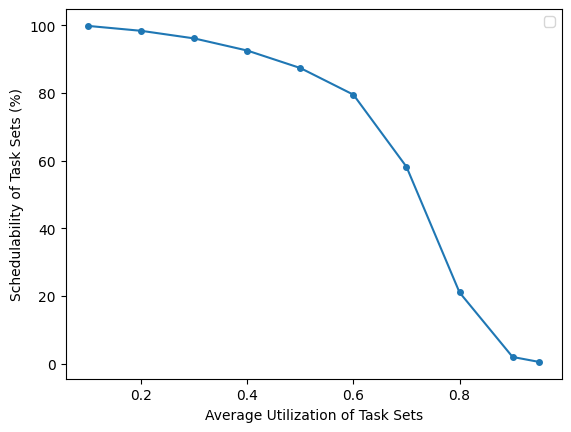

In [96]:
utilization = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

plt.plot(utilization, schedulable, marker='o', markersize=4)
# Plotting the second line graph

# Adding labels and a legend
plt.ylabel('Schedulability of Task Sets (%)')
plt.xlabel('Average Utilization of Task Sets')
plt.legend()

# Displaying the plot
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


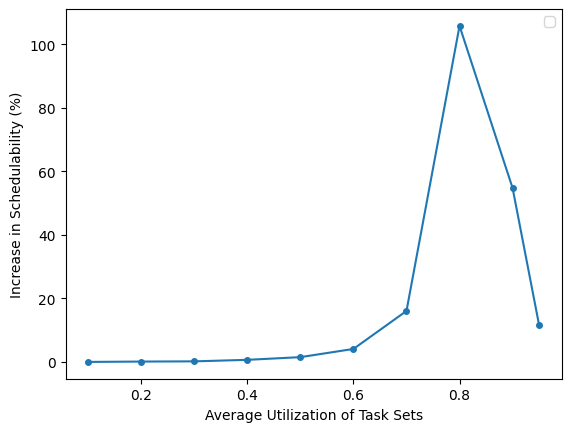

In [99]:
utilization = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

plt.plot(utilization, increase, marker='o', markersize=4)
# Plotting the second line graph

# Adding labels and a legend
plt.ylabel('Increase in Schedulability (%)')
plt.xlabel('Average Utilization of Task Sets')
plt.legend()

# Displaying the plot
plt.show()



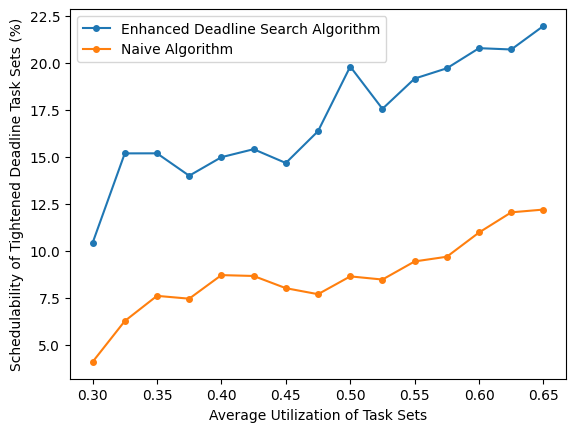

In [95]:
utilization = [0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65]
assert len(success_rate) == len(utilization)
plt.plot(utilization, success_rate, label='Enhanced Deadline Search Algorithm', marker='o', markersize=4)
# Plotting the second line graph
plt.plot(utilization, success_rate_naive, label='Naive Algorithm', marker='o', markersize=4)

# Adding labels and a legend
plt.ylabel('Schedulability of Tightened Deadline Task Sets (%)')
plt.xlabel('Average Utilization of Task Sets')
plt.legend()

# Displaying the plot
plt.show()



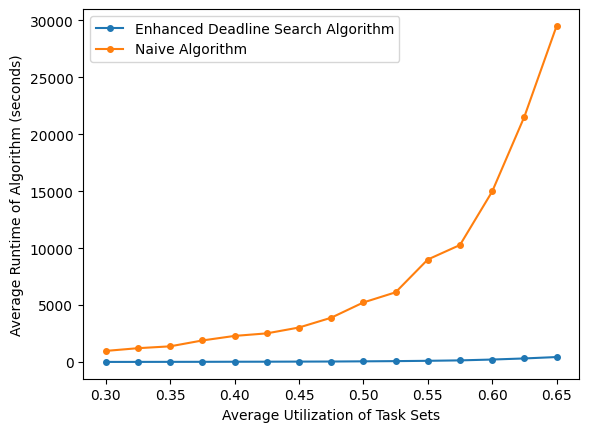

In [91]:
utilization = [0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65]
plt.plot(utilization, time, label='Enhanced Deadline Search Algorithm', marker='o', markersize=4)
# Plotting the second line graph
plt.plot(utilization, naive_time, label='Naive Algorithm', marker='o', markersize=4)

# Adding labels and a legend
plt.ylabel('Average Runtime of Algorithm (seconds)')
plt.xlabel('Average Utilization of Task Sets')
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.legend()

# Displaying the plot
plt.show()



In [102]:
for i in range(len(success_rate)):
  print((success_rate[i] - success_rate_naive[i])/success_rate_naive[i], naive_time[i], time[i])

1.5555555555555558 974.6861538461538 9.265755656108597
1.4285714285714284 1214.723044642857 11.35108482142857
1.0 1377.7121188118813 15.18014191419142
0.8800000000000001 1893.2865357142857 18.096071428571427
0.7222222222222222 2292.842881642512 25.157347826086955
0.7804878048780488 2516.142911392405 28.98246624472574
0.8333333333333333 3029.772796190476 37.22573714285714
1.130434782608696 3889.019260434057 44.017207011686146
1.295081967213115 5230.35082602546 60.80615841584159
1.0746268656716413 6121.18582449495 79.26223737373738
1.0333333333333332 9001.712585340314 106.58892146596858
1.0373831775700935 10277.890716094033 144.52490777576855
0.8951048951048949 14976.013580521472 218.3903190184049
0.720430107526882 21551.807330097086 315.1393281553398
0.8025751072961373 29514.845113493724 437.47640794979077
